## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0  1.497240  1.194435 -0.740136  0.215834  0.763745  0.775188
1  1.609626 -0.576769 -1.396366  1.433783 -0.113016  1.602861
2  0.630578 -0.090105  1.268844  1.360167 -0.334913  1.564374
3 -0.647488 -0.756350  1.636031  0.515896  0.389899  0.441767
4  0.599391  1.703946 -1.544492  0.451113 -0.557801  1.467279


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9869582	total: 57ms	remaining: 56.9s
1:	learn: 0.9782874	total: 57.5ms	remaining: 28.7s
2:	learn: 0.9660448	total: 58.1ms	remaining: 19.3s
3:	learn: 0.9533555	total: 58.6ms	remaining: 14.6s
4:	learn: 0.9435558	total: 59.1ms	remaining: 11.8s
5:	learn: 0.9333822	total: 59.5ms	remaining: 9.86s
6:	learn: 0.9224690	total: 60ms	remaining: 8.51s
7:	learn: 0.9114796	total: 60.8ms	remaining: 7.54s
8:	learn: 0.9020705	total: 61.6ms	remaining: 6.78s
9:	learn: 0.8924365	total: 62.9ms	remaining: 6.23s
10:	learn: 0.8818817	total: 63.6ms	remaining: 5.71s
11:	learn: 0.8703924	total: 64.1ms	remaining: 5.28s
12:	learn: 0.8591162	total: 64.5ms	remaining: 4.9s
13:	learn: 0.8495883	total: 65.1ms	remaining: 4.58s
14:	learn: 0.8422514	total: 65.5ms	remaining: 4.3s
15:	learn: 0.8343499	total: 66ms	remaining: 4.06s
16:	learn: 0.8255071	total: 66.4ms	remaining: 3.84s
17:	learn: 0.8186412	total: 66.8ms	remaining: 3.64s
18:	learn: 0.8097989	total: 67.2ms	remaining: 3.47s


85:	learn: 0.4190105	total: 102ms	remaining: 1.08s
86:	learn: 0.4154163	total: 103ms	remaining: 1.08s
87:	learn: 0.4114647	total: 103ms	remaining: 1.07s
88:	learn: 0.4077448	total: 104ms	remaining: 1.06s
89:	learn: 0.4040718	total: 106ms	remaining: 1.07s
90:	learn: 0.4000722	total: 106ms	remaining: 1.06s
91:	learn: 0.3966529	total: 107ms	remaining: 1.05s
92:	learn: 0.3934311	total: 107ms	remaining: 1.05s
93:	learn: 0.3896377	total: 108ms	remaining: 1.04s
94:	learn: 0.3857343	total: 109ms	remaining: 1.03s
95:	learn: 0.3821666	total: 109ms	remaining: 1.03s
96:	learn: 0.3790125	total: 110ms	remaining: 1.02s
97:	learn: 0.3755982	total: 110ms	remaining: 1.01s
98:	learn: 0.3718795	total: 111ms	remaining: 1.01s
99:	learn: 0.3686265	total: 111ms	remaining: 1s
100:	learn: 0.3655612	total: 112ms	remaining: 994ms
101:	learn: 0.3621362	total: 112ms	remaining: 988ms
102:	learn: 0.3593825	total: 113ms	remaining: 981ms
103:	learn: 0.3564915	total: 113ms	remaining: 974ms
104:	learn: 0.3534211	total: 1

235:	learn: 0.1406776	total: 186ms	remaining: 601ms
236:	learn: 0.1397696	total: 186ms	remaining: 600ms
237:	learn: 0.1390330	total: 187ms	remaining: 598ms
238:	learn: 0.1380987	total: 187ms	remaining: 596ms
239:	learn: 0.1371966	total: 188ms	remaining: 594ms
240:	learn: 0.1363916	total: 188ms	remaining: 593ms
241:	learn: 0.1356318	total: 189ms	remaining: 591ms
242:	learn: 0.1346752	total: 189ms	remaining: 589ms
243:	learn: 0.1339044	total: 189ms	remaining: 587ms
244:	learn: 0.1328245	total: 190ms	remaining: 585ms
245:	learn: 0.1320427	total: 190ms	remaining: 583ms
246:	learn: 0.1311133	total: 191ms	remaining: 581ms
247:	learn: 0.1301982	total: 191ms	remaining: 579ms
248:	learn: 0.1293780	total: 191ms	remaining: 578ms
249:	learn: 0.1283862	total: 192ms	remaining: 576ms
250:	learn: 0.1274353	total: 192ms	remaining: 574ms
251:	learn: 0.1265504	total: 193ms	remaining: 572ms
252:	learn: 0.1256096	total: 193ms	remaining: 571ms
253:	learn: 0.1248197	total: 194ms	remaining: 569ms
254:	learn: 

418:	learn: 0.0513582	total: 284ms	remaining: 393ms
419:	learn: 0.0511541	total: 285ms	remaining: 393ms
420:	learn: 0.0510521	total: 285ms	remaining: 392ms
421:	learn: 0.0507952	total: 286ms	remaining: 392ms
422:	learn: 0.0506710	total: 287ms	remaining: 391ms
423:	learn: 0.0505714	total: 287ms	remaining: 390ms
424:	learn: 0.0504733	total: 288ms	remaining: 389ms
425:	learn: 0.0502212	total: 288ms	remaining: 388ms
426:	learn: 0.0501007	total: 289ms	remaining: 387ms
427:	learn: 0.0499044	total: 289ms	remaining: 387ms
428:	learn: 0.0498092	total: 290ms	remaining: 386ms
429:	learn: 0.0497154	total: 290ms	remaining: 385ms
430:	learn: 0.0494720	total: 291ms	remaining: 384ms
431:	learn: 0.0493556	total: 291ms	remaining: 383ms
432:	learn: 0.0491660	total: 292ms	remaining: 382ms
433:	learn: 0.0489686	total: 292ms	remaining: 381ms
434:	learn: 0.0488782	total: 293ms	remaining: 380ms
435:	learn: 0.0486409	total: 293ms	remaining: 379ms
436:	learn: 0.0484568	total: 294ms	remaining: 378ms
437:	learn: 

579:	learn: 0.0299152	total: 368ms	remaining: 266ms
580:	learn: 0.0297817	total: 368ms	remaining: 266ms
581:	learn: 0.0296462	total: 369ms	remaining: 265ms
582:	learn: 0.0295152	total: 369ms	remaining: 264ms
583:	learn: 0.0293871	total: 370ms	remaining: 264ms
584:	learn: 0.0292546	total: 370ms	remaining: 263ms
585:	learn: 0.0291302	total: 371ms	remaining: 262ms
586:	learn: 0.0289607	total: 371ms	remaining: 261ms
587:	learn: 0.0288208	total: 372ms	remaining: 261ms
588:	learn: 0.0286847	total: 373ms	remaining: 260ms
589:	learn: 0.0285205	total: 373ms	remaining: 259ms
590:	learn: 0.0283880	total: 373ms	remaining: 258ms
591:	learn: 0.0282642	total: 374ms	remaining: 258ms
592:	learn: 0.0281116	total: 374ms	remaining: 257ms
593:	learn: 0.0279911	total: 375ms	remaining: 256ms
594:	learn: 0.0278642	total: 375ms	remaining: 255ms
595:	learn: 0.0277541	total: 376ms	remaining: 255ms
596:	learn: 0.0276060	total: 376ms	remaining: 254ms
597:	learn: 0.0274987	total: 384ms	remaining: 258ms
598:	learn: 

745:	learn: 0.0163414	total: 466ms	remaining: 159ms
746:	learn: 0.0162797	total: 467ms	remaining: 158ms
747:	learn: 0.0162213	total: 467ms	remaining: 157ms
748:	learn: 0.0161611	total: 468ms	remaining: 157ms
749:	learn: 0.0161473	total: 469ms	remaining: 156ms
750:	learn: 0.0160909	total: 469ms	remaining: 156ms
751:	learn: 0.0160775	total: 470ms	remaining: 155ms
752:	learn: 0.0160198	total: 470ms	remaining: 154ms
753:	learn: 0.0159774	total: 471ms	remaining: 154ms
754:	learn: 0.0159641	total: 471ms	remaining: 153ms
755:	learn: 0.0159176	total: 472ms	remaining: 152ms
756:	learn: 0.0158546	total: 472ms	remaining: 152ms
757:	learn: 0.0158417	total: 473ms	remaining: 151ms
758:	learn: 0.0158289	total: 473ms	remaining: 150ms
759:	learn: 0.0157810	total: 474ms	remaining: 150ms
760:	learn: 0.0157251	total: 474ms	remaining: 149ms
761:	learn: 0.0156746	total: 475ms	remaining: 148ms
762:	learn: 0.0156262	total: 475ms	remaining: 148ms
763:	learn: 0.0155793	total: 476ms	remaining: 147ms
764:	learn: 

904:	learn: 0.0105629	total: 547ms	remaining: 57.4ms
905:	learn: 0.0105199	total: 547ms	remaining: 56.8ms
906:	learn: 0.0104767	total: 550ms	remaining: 56.4ms
907:	learn: 0.0104343	total: 551ms	remaining: 55.8ms
908:	learn: 0.0104247	total: 551ms	remaining: 55.2ms
909:	learn: 0.0104153	total: 552ms	remaining: 54.6ms
910:	learn: 0.0103857	total: 552ms	remaining: 53.9ms
911:	learn: 0.0103740	total: 561ms	remaining: 54.1ms
912:	learn: 0.0103450	total: 561ms	remaining: 53.4ms
913:	learn: 0.0103037	total: 562ms	remaining: 52.8ms
914:	learn: 0.0102922	total: 562ms	remaining: 52.2ms
915:	learn: 0.0102867	total: 563ms	remaining: 51.6ms
916:	learn: 0.0102557	total: 563ms	remaining: 51ms
917:	learn: 0.0102398	total: 564ms	remaining: 50.4ms
918:	learn: 0.0101972	total: 564ms	remaining: 49.7ms
919:	learn: 0.0101918	total: 565ms	remaining: 49.1ms
920:	learn: 0.0101631	total: 566ms	remaining: 48.5ms
921:	learn: 0.0101211	total: 568ms	remaining: 48ms
922:	learn: 0.0101157	total: 569ms	remaining: 47.5

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

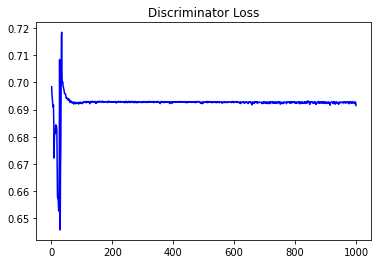

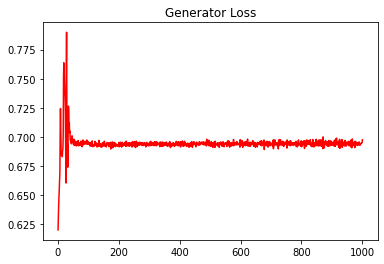

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.05133380843974308


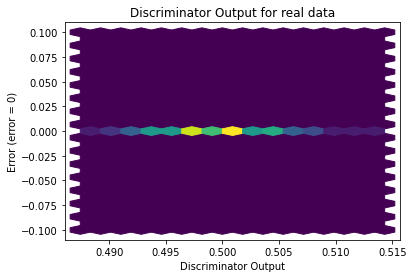

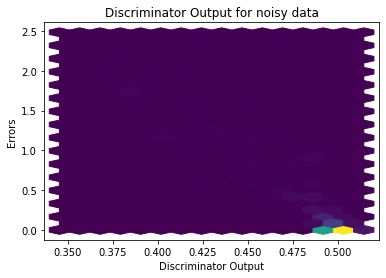

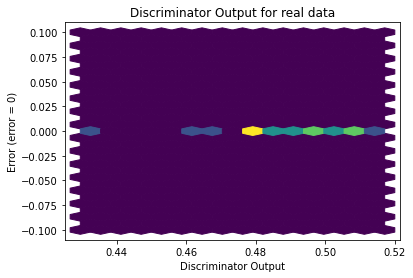

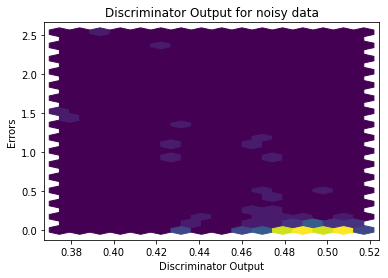

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


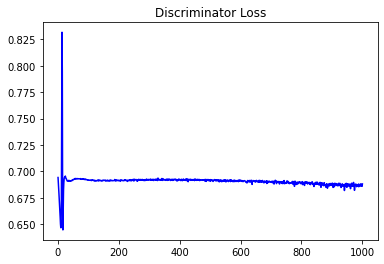

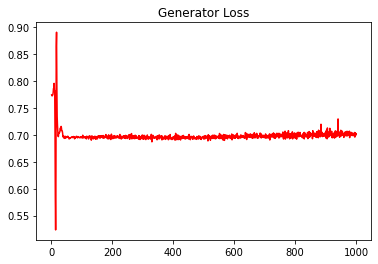

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.044062914013973


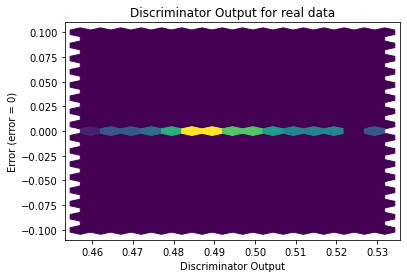

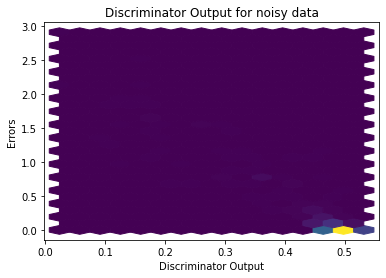

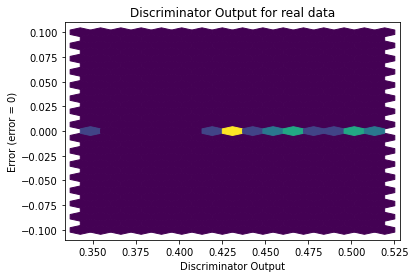

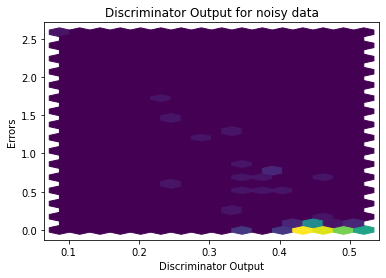

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0858]], requires_grad=True)
